<a href="https://colab.research.google.com/github/alfrizzle/NLP-Projects/blob/master/BERT_Tokenizer_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
!pwd

/content


In [ ]:
os.chdir('/content/drive/MyDrive/KoBERT-NER-master')
!pwd

/content/drive/MyDrive/KoBERT-NER-master


In [ ]:
!ls

data		main.py     __pycache__		sample_pred_out.txt
data_02		model	    README.md		tokenization_kobert.py
data_loader.py	model_02    requirements.txt	trainer.py
LICENSE		predict.py  sample_pred_in.txt	utils.py


In [ ]:
!pip install transformers==2.10.0 seqeval

     |████████████████████████████████| 665kB 7.4MB/s 
     |████████████████████████████████| 51kB 7.5MB/s 
     |████████████████████████████████| 5.6MB 43.3MB/s 
     |████████████████████████████████| 1.2MB 48.7MB/s 
     |████████████████████████████████| 901kB 41.1MB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-cp37-none-any.whl size=16184 sha256=7fb6d1da15e950768b622d84834c6168da6fc7d9ba0181b0704d008aa94c7799
  Stored in directory: /root/.cache/pip/wheels/52/df/1b/45d75646c37428f7e626214704a0e35bd3cfc32eda37e59e5f
Successfully built seqeval


In [ ]:
task = "ner" # Should be one of "ner", "pos" or "chunk"
model_checkpoint = "monologg/kobert"
batch_size = 32

In [ ]:
!pip install datasets

     |████████████████████████████████| 266kB 7.9MB/s 
     |████████████████████████████████| 245kB 37.8MB/s 
     |████████████████████████████████| 122kB 47.0MB/s 


In [ ]:
from datasets import load_dataset, load_metric

In [ ]:
datasets = load_dataset('kor_ner')

Using custom data configuration default


Dataset kor_ner downloaded and prepared to /root/.cache/huggingface/datasets/kor_ner/default/1.1.0/1f019c13620cd0f9d3a4b79c684b0b3e2ece528a306b9f5a1be5c4154d405c02. Subsequent calls will reuse this data.


In [ ]:
datasets

DatasetDict({
    train: Dataset({
        features: ['text', 'annot_text', 'tokens', 'pos_tags', 'ner_tags'],
        num_rows: 2928
    })
    test: Dataset({
        features: ['text', 'annot_text', 'tokens', 'pos_tags', 'ner_tags'],
        num_rows: 366
    })
    validation: Dataset({
        features: ['text', 'annot_text', 'tokens', 'pos_tags', 'ner_tags'],
        num_rows: 366
    })
})

In [ ]:
datasets["train"][0]

{'annot_text': '나도 때늦은 <홍길동:PS>이보다는 이 사회의 기본 구조를 변혁시키는 쪽이 더 많은 사람을 보다 효과적으로 구할 수 있다는 것쯤은 알고 있오.',
 'ner_tags': [1,
  1,
  1,
  1,
  6,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'pos_tags': [13,
  39,
  34,
  27,
  12,
  10,
  7,
  39,
  8,
  31,
  36,
  31,
  31,
  28,
  31,
  24,
  27,
  29,
  40,
  25,
  34,
  27,
  31,
  28,
  25,
  31,
  10,
  7,
  2,
  27,
  29,
  2,
  27,
  29,
  10,
  39,
  2,
  18,
  2,
  19,
  38],
 'text': '나도 때늦은 홍길동이보다는 이 사회의 기본 구조를 변혁시키는 쪽이 더 많은 사람을 보다 효과적으로 구할 수 있다는 것쯤은 알고 있오.',
 'tokens': ['나',
  '도',
  '때늦',
  '은',
  '홍길동',
  '이',
  '보다',
  '는',
  '이',
  '사회',
  '의',
  '기본',
  '구조',
  '를',
  '변혁',
  '시키',
  '는',
  '쪽',
  '이',
  '더',
  '많',
  '은',
  '사람',
  '을',
  '보다',
  '효과',
  '적',
  '으로',
  '구하',
  'ㄹ',
  '수',
  '있',
  '다는',
  '것',
  '쯤',
  '은',
  '알',
  '고',
  '있',
  '오',
  '.']}

In [ ]:
datasets["train"].features[f"ner_tags"]

Sequence(feature=ClassLabel(num_classes=7, names=['I', 'O', 'B_OG', 'B_TI', 'B_LC', 'B_DT', 'B_PS'], names_file=None, id=None), length=-1, id=None)

In [ ]:
label_list = datasets["train"].features[f"{task}_tags"].feature.names
label_list

['I', 'O', 'B_OG', 'B_TI', 'B_LC', 'B_DT', 'B_PS']

In [ ]:
from transformers import BertModel
from tokenization_kobert import KoBertTokenizer

In [ ]:
model = BertModel.from_pretrained('monologg/kobert')
tokenizer = KoBertTokenizer.from_pretrained('monologg/kobert')

In [ ]:
test_sentence = "코로나 바이러스. 코로나19"
tokenizer.tokenize(test_sentence)

['▁코', '로', '나', '▁바이러스', '.', '▁코', '로', '나', '19']

In [ ]:
len(tokenizer)

8002

In [ ]:
tokenizer.add_tokens(["코로나"])

1

In [ ]:
len(tokenizer)

8003

In [ ]:
tokenizer.tokenize(test_sentence)

['코로나', '▁바이러스', '.', '코로나', '▁19']

In [ ]:
# Add a new randomly initialized vector to the end of the embeddings matrix
model.resize_token_embeddings(len(tokenizer)) 

Embedding(8003, 768)

In [ ]:
# New radom embedding vector
model.get_input_embeddings().weight[-1].shape

torch.Size([768])

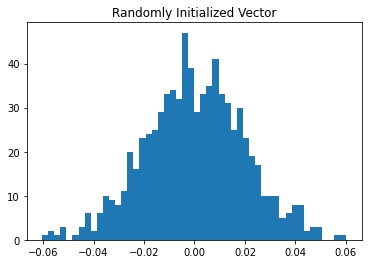

In [ ]:
import matplotlib.pyplot as plt

random_vector = model.get_input_embeddings().weight[-1].detach().numpy()

plt.title("Randomly Initialized Vector")
plt.hist(random_vector, bins=50)
plt.show()

In [ ]:
!nvidia-smi

Fri Jul 16 00:34:09 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import torch

# Check that PyTorch sees it
torch.cuda.is_available()

True

In [ ]:
# prepare text files to train vocab on them
train_data = ['/content/drive/My Drive/KoBERT-NER-master/data/train.tsv']

In [ ]:
# # train KoBERT tokenizer
# tokenizer(train_data)

In [ ]:
# save the vocab
tokenizer.save('.', 'bert')

In [ ]:
sentence = '특별한인연, R&D 신문로 증수'
tokenizer.tokenize(sentence)

['▁특별한', '인', '연', ',', '▁R', '&', 'D', '▁신문', '로', '▁증', '수']

In [ ]:
tokenizer.convert_tokens_to_ids(['▁특별한', '인', '연', ',', '▁R', '&', 'D', '▁신문', '로', '▁증', '수'])

[4780, 7119, 6928, 46, 686, 13, 278, 3017, 6079, 4285, 6629]

In [ ]:
tokenizer.

'특별한인연, R&D 신문로 증수'

In [ ]:
def load_sentences(filepath):

    final = []
    sentences = []

    with open(filepath, 'r') as f:
        
        for line in f.readlines():
            
            if (line == ('-DOCSTART- -X- -X- O\n') or line == '\n'):
                if len(sentences) > 0:
                    final.append(sentences)
                    sentences = []
            else:
                l = line.split(' ')
                sentences.append((l[0], l[3].strip('\n')))
    
    return final

In [ ]:
 def load_data(filename: str):
   with open(filename, 'r') as file:
     lines = [line[:-1].split() for line in file]
   samples, start = [], 0
   for end, parts in enumerate(lines):
     if not parts:
       sample = [(token, tag.split('-')[-1]) 
                for token, tag in lines[start:end]]
       samples.append(sample)
       start = end + 1
   if start < end:
     samples.append(lines[start:end])
   return samples

In [ ]:
base_path = '/content/drive/My Drive/KoBERT-NER-master/data/'
train_samples = load_data(base_path + 'train.tsv')
test_samples = load_data(base_path + 'test.tsv')
samples = train_samples + test_samples

schema = ['_'] + sorted({tag for sentence in samples 
                             for _, tag in sentence})

ValueError: ignored